In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

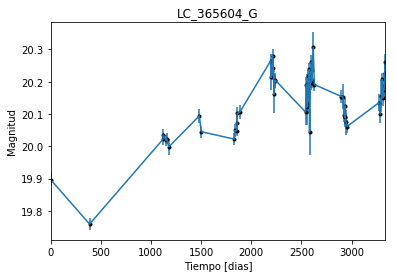

In [3]:
data = np.genfromtxt('LC_365604_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_365604_G')
plt.savefig("LC_365604_G.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

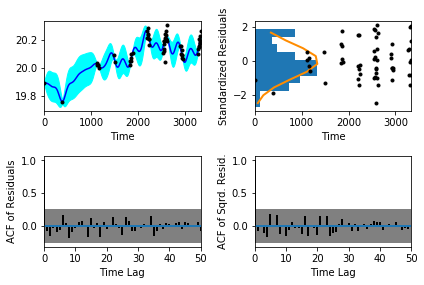

In [6]:
sample.assess_fit()

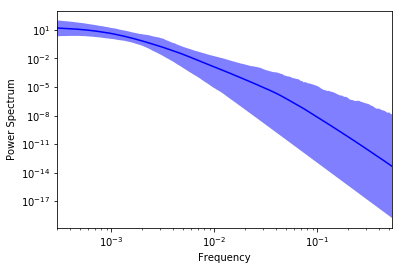

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

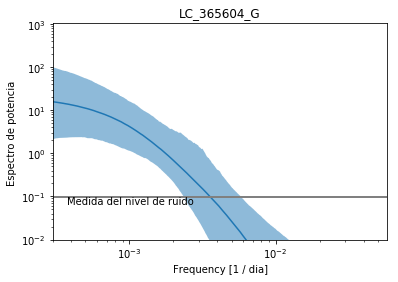

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_365604_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_365604_G')

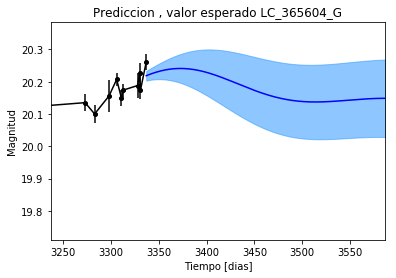

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_365604_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_365604_G')

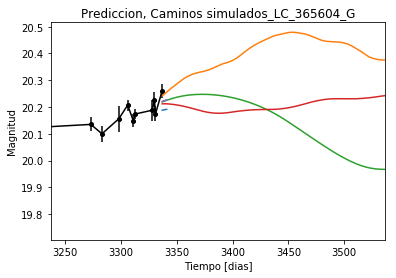

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_365604_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


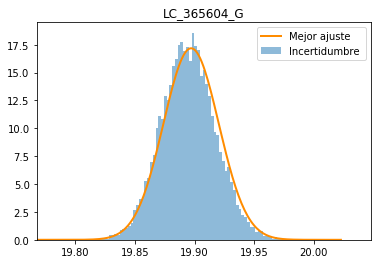

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_365604_G')
plt.savefig("Mejor_ajuste_LC_365604_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_365604_G')

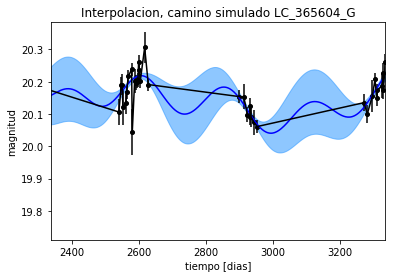

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_G')

Text(0.5,1,'Interpolacion, camino simulado LC_365604_G')

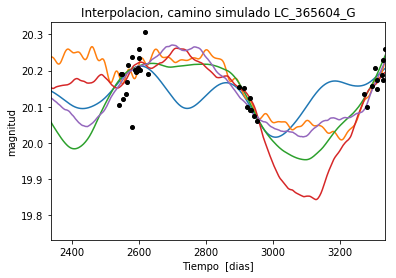

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 737.103265819
Median: 0.00790825929418
Standard deviation: 0.207098305471
68% credibility interval: [ 0.00067705  0.18848448]
95% credibility interval: [  3.27294193e-04   8.20039341e-01]
99% credibility interval: [  3.06164157e-04   1.00016490e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1554.45498169
Median: 0.00107391502423
Standard deviation: 0.0446964846369
68% credibility interval: [ 0.00043093  0.00847354]
95% credibility interval: [ 0.00031572  0.09755116]
99% credibility interval: [  3.02720227e-04   3.04488562e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 455.867474412
Median: 0.0178325350862
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1752.67486052
Median: 125.12240504
Standard deviation: 1.57147462246
68% credibility interval: [ 123.3581738   126.22642438]
95% credibility interval: [ 120.91111073  126.92657224]
99% credibility interval: [ 118.85421346  127.33376656]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 800.5485882
Median: 0.616203952843
Standard deviation: 2.07559882298
68% credibility interval: [ 0.05081549  3.6627802 ]
95% credibility interval: [ 0.01527654  6.94231585]
99% credibility interval: [ 0.01067511  9.53979424]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 471.234737575
Median: 0.113311170323
Standard deviation: 7.67978683728
68% credibility interval: [ 0.0044918   3.58478793]
95% credibility interval: [  2.95617998e-04 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1470.91186307
Median: 9.20040512289e-24
Standard deviation: 5.29320919626e+146
68% credibility interval: [  4.86436508e-44   7.59431278e-04]
95% credibility interval: [  1.66026646e-063   2.06250916e+125]
99% credibility interval: [  3.49363941e-069   3.12823414e+139]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2918.42408845
Median: 20.0558865328
Standard deviation: 0.097957295158
68% credibility interval: [ 19.97984701  20.13596798]
95% credibility interval: [ 19.87152441  20.26258137]
99% credibility interval: [ 19.75196401  20.40693756]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 339.284825119
Median: 0.000579350239317
Standard deviation: 0.214302853451
68% credibility interval: [ 0.          0.11043316]
95% credibility interval: [ 0.          0.86808006]
99% credibility interval: [ 0.          1.03290787]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 339.284825119
Median: 0.000579350239317
Standard deviation: 0.214302853451
68% credibility interval: [ 0.          0.11043316]
95% credibility interval: [ 0.          0.86808006]
99% credibility interval: [ 0.          1.03290787]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1250.28772508
Median: 0.0
Standard deviation: 0.000327911435971
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1752.67486052
Median: 125.12240504
Standard deviation: 1.57147462246
68% credibility interval: [ 123.3581738   126.22642438]
95% credibility interval: [ 120.91111073  126.92657224]
99% credibility interval: [ 118.85421346  127.33376656]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1991.39698112
Median: 0.0317595181465
Standard deviation: 0.0432040128373
68% credibility interval: [ 0.01772691  0.06318843]
95% credibility interval: [ 0.01111493  0.14720307]
99% credibility interval: [ 0.00885189  0.26353158]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2255.62089111
Median: 1.13825246325
Standard deviation: 0.176201124543
68% credibility interval: [ 0.98126602  1.33010267]
95% credibility interval: [ 0.85239634  1.53682922]
99% credibility interval: [ 0.7879184   1.69032639]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 443.90467515
Median: 1.93416550962e-05
Standard deviation: 0.0247310858188
68% credibility interval: [  3.22168255e-07   8.09989313e-04]
95% credibility interval: [  1.59700276e-129   9.17752591e-003]
99% credibility interval: [  2.93266528e-143   1.12044073e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 737.103265819
Median: (-0.0496890586026-0.0203922163626j)
Standard deviation: 1.87250962212
68% credibility interval: [-1.18428289 -2.41645163e+00j -0.00425406 -1.55570923e-03j]
95% credibility interval: [ -5.15245914e+00+0.j          -2.05645006e-03-0.03730922j]
99% credibility interval: [ -6.28422142e+00-3.13516348j  -1.92368613e-03-0.02727913j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1554.45498169
Median: (-0.00674760710143+0.00387631141818j)
Standard deviation: 1.37547937148
68% credibility interval: [-0.05324085+6.06014317j -0.00270760+0.00623693j]
95% credibility interval: [-0.61293201+0.j         -0.00198375+0.00030524j]
99% credibility interval: [ -1.91315806e+00+4.40849165j  -1.90204729e-03+0.j        